# 主成分分析（Principal Component Analysis）

分散共分散行列をもとめて、固有値、固有ベクトルを計算する。

We calculate variance covariance matrix and then its eigenvalues and eigenvectors.

### NumPyとscikit-learnによる主成分分析：テキスト通りのスクリプト

分散共分散行列 variance-covariance matrix 
[[3.98836461 2.12351884]
 [2.12351884 5.1323994 ]]


固有値 eigenvalue
[2.36116937 6.75959463]


固有ベクトル eigenvector 
[[-0.7937572  -0.60823474]
 [ 0.60823474 -0.7937572 ]]


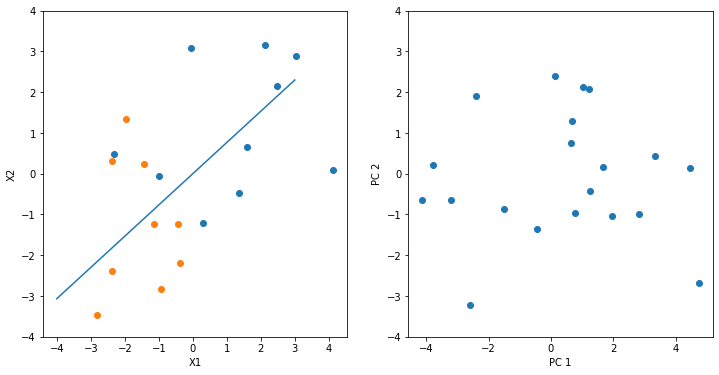

,pc1,pc2
固有値,6.759595,2.361169


,pc1,pc2
0,0.608235,0.793757
1,0.793757,-0.608235


,pc1,pc2
寄与率,0.741122,0.258878


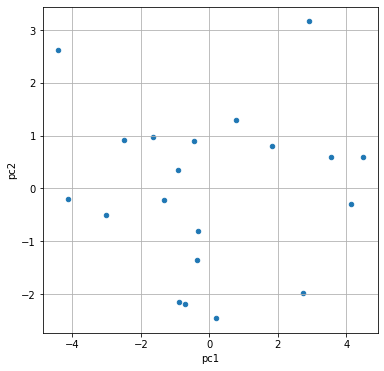

In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel('testdat.xlsx')
data=np.array((df['x1'],df['x2']))


mat_cov=np.cov(data)
print("分散共分散行列 variance-covariance matrix \n{}".format(mat_cov))
print("\n")
eig_value, eig_vector = np.linalg.eig(mat_cov)
print("固有値 eigenvalue\n{}".format(eig_value))
print("\n")
print("固有ベクトル eigenvector \n{}".format(eig_vector))
#
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(-4,4,1)
pc1=np.dot(data.T,eig_vector.T[1])
pc2=np.dot(data.T,eig_vector.T[0])
#
fig,ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].scatter(data[0][:10],data[1][:10])
ax[0].scatter(data[0][10:],data[1][10:])
ax[0].plot(x,x/eig_vector.T[1][1]*eig_vector.T[1][0])
ax[0].set_ylim(-4,4)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[1].scatter(pc1,pc2)
ax[1].set_ylim(-4,4)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
plt.show()
#
import pandas as pd
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler
#
pca = PCA()  # Class 関数の呼び出し
pca.fit(data.T)
pca_cor = pca.transform(data.T) # データを主成分空間に写像
#eigen values　（固有値）
eig = pd.DataFrame(pca.explained_variance_, index=['pc1','pc2'], columns=['固有値'])
display(eig.T)
# eigenvectors　（固有ベクトル）
eig_vec = pd.DataFrame(pca.components_.T, columns = ['pc1','pc2'])
display(eig_vec)
# proportion of the variance　(寄与率）
pv = pd.DataFrame(pca.explained_variance_ratio_, index=['pc1','pc2'], columns=['寄与率'])
display(pv.T)
# score plots
cor = pd.DataFrame(pca_cor, columns=['pc1','pc2'])
fig, ax = plt.subplots(figsize=(6,6))
cor.plot(x='pc1',y='pc2',kind='scatter', ax=ax, grid=True, legend=True)
plt.show()

### テキスト通り　乱数を発生しながらPCAする。scikit-learn固有値の大きさの順に出力するようにデザインされている。

分散共分散行列 variance-covariance matrix 
[[4.69836596 1.3017739 ]
 [1.3017739  5.13409818]]


固有値 eigenvalue
[3.59635294 6.2361112 ]


固有ベクトル eigenvector 
[[-0.76323823 -0.64611717]
 [ 0.64611717 -0.76323823]]


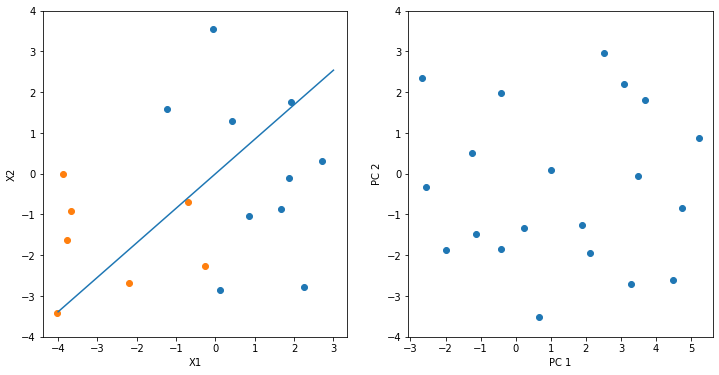

,pc1,pc2
固有値,6.236111,3.596353


,pc1,pc2
0,0.646117,-0.763238
1,0.763238,0.646117


,pc1,pc2
寄与率,0.634237,0.365763


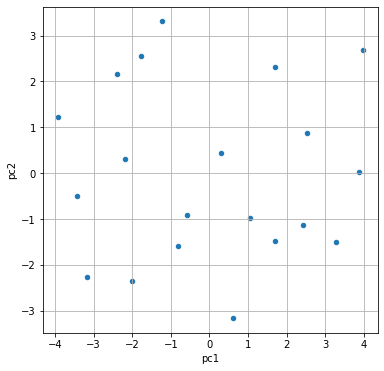

In [2]:
import numpy as np
# np.random.normal(loc,scale,)は、平均loc、標準偏差scaleの正規分布に従う乱数を返します
A=np.random.normal(1,2,(2,10))
B=np.random.normal(-2,2,(2,10))
#
data=np.hstack((A,B))
mat_cov=np.cov(data)
print("分散共分散行列 variance-covariance matrix \n{}".format(mat_cov))
print("\n")
eig_value, eig_vector = np.linalg.eig(mat_cov)
print("固有値 eigenvalue\n{}".format(eig_value))
print("\n")
print("固有ベクトル eigenvector \n{}".format(eig_vector))
#
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(-4,4,1)
pc1=np.dot(data.T,eig_vector.T[1])
pc2=np.dot(data.T,eig_vector.T[0])
#
fig,ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].scatter(data[0][:10],data[1][:10])
ax[0].scatter(data[0][10:],data[1][10:])
ax[0].plot(x,x/eig_vector.T[1][1]*eig_vector.T[1][0])
ax[0].set_ylim(-4,4)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[1].scatter(pc1,pc2)
ax[1].set_ylim(-4,4)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
plt.show()
#
import pandas as pd
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler
#
pca = PCA()  # Class 関数の呼び出し
pca.fit(data.T)
pca_cor = pca.transform(data.T) # データを主成分空間に写像
#eigen values　（固有値）
eig = pd.DataFrame(pca.explained_variance_, index=['pc1','pc2'], columns=['固有値'])
display(eig.T)
# eigenvectors　（固有ベクトル）
eig_vec = pd.DataFrame(pca.components_.T, columns = ['pc1','pc2'])
display(eig_vec)
# proportion of the variance　(寄与率）
pv = pd.DataFrame(pca.explained_variance_ratio_, index=['pc1','pc2'], columns=['寄与率'])
display(pv.T)
# score plots
cor = pd.DataFrame(pca_cor, columns=['pc1','pc2'])
fig, ax = plt.subplots(figsize=(6,6))
cor.plot(x='pc1',y='pc2',kind='scatter', ax=ax, grid=True, legend=True)
plt.show()


###  End of script